## **prepare**

In [1]:
import numpy as np
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Membaca data dari file CSV
data = pd.read_excel('/content/drive/MyDrive/dewi/DATA/DataHasilNormalisasi.xlsx')
data

,Usia Saat Ukur,Berat,Tinggi,JK_L,JK_P,Diagnosa
0,0.6,0.532751,0.694444,1,0,0
1,0.8,0.572052,0.777778,1,0,0
2,0.4,0.436681,0.527778,1,0,1
3,0.0,0.056769,0.069444,1,0,0
4,0.8,0.620087,0.805556,1,0,0
...,...,...,...,...,...,...
2093,0.2,0.323144,0.388889,1,0,0
2094,0.4,0.414847,0.486111,0,1,0
2095,0.2,0.301310,0.388889,0,1,0
2096,0.8,0.537118,0.777778,1,0,0


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import time
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report

In [5]:
# Menghitung jumlah orang dalam setiap kelas
jumlah_stunting = (data['Diagnosa'] == 1).sum()
jumlah_tidakstunting= (data['Diagnosa'] == 0).sum()

# Menampilkan hasil
print(f"Jumlah Stunting 1: {jumlah_stunting}")
print(f"Jumlah Tidak Stunting 0: {jumlah_tidakstunting}")

Jumlah Stunting 1: 303
Jumlah Tidak Stunting 0: 1795


In [6]:
data

,Usia Saat Ukur,Berat,Tinggi,JK_L,JK_P,Diagnosa
0,0.6,0.532751,0.694444,1,0,0
1,0.8,0.572052,0.777778,1,0,0
2,0.4,0.436681,0.527778,1,0,1
3,0.0,0.056769,0.069444,1,0,0
4,0.8,0.620087,0.805556,1,0,0
...,...,...,...,...,...,...
2093,0.2,0.323144,0.388889,1,0,0
2094,0.4,0.414847,0.486111,0,1,0
2095,0.2,0.301310,0.388889,0,1,0
2096,0.8,0.537118,0.777778,1,0,0


In [7]:
# Pisahkan fitur dan target
X = data[['Usia Saat Ukur', 'Berat', 'Tinggi','JK_L','JK_P']]  # Fitur (input)
y = data['Diagnosa']  # Target (output)

In [8]:
# Bagi dataset menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## **hyperparameter tunning**

In [9]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Persiapan parameter yang akan diuji untuk SVM
param_grid = {
    'C': [0.1, 1, 10, 100, 1000],  # Parameter untuk regularisasi
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],  # Jenis kernel
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001],  # Koefisien kernel
}

# Membuat model SVM
svm = SVC()

# Membuat objek GridSearchCV
grid_search = GridSearchCV(svm, param_grid, cv=5, scoring='accuracy')

# Melakukan pelatihan model dengan GridSearchCV pada data latih
grid_search.fit(X_train, y_train)

# Menampilkan hasil parameter terbaik dan akurasi terbaik
print("Parameter terbaik:", grid_search.best_params_)
print("Akurasi terbaik:", grid_search.best_score_)

# Menggunakan model terbaik untuk memprediksi data uji
y_pred = grid_search.best_estimator_.predict(X_test)

# Menghitung akurasi pada data uji
test_accuracy = accuracy_score(y_test, y_pred)
print("Akurasi pada data uji:", test_accuracy)

# Menampilkan hasil keseluruhan dari GridSearchCV
results = grid_search.cv_results_
print("Hasil Keseluruhan:")
param_terbaik = []
for mean_score, params in zip(results['mean_test_score'], results['params']):
    print(f"Skor: {mean_score}, Parameter: {params}")


Parameter terbaik: {'C': 1000, 'gamma': 1, 'kernel': 'poly'}
Akurasi terbaik: 0.9237153518123667
Akurasi pada data uji: 0.9071428571428571
Hasil Keseluruhan:
Skor: 0.8611460554371003, Parameter: {'C': 0.1, 'gamma': 1, 'kernel': 'linear'}
Skor: 0.8611460554371003, Parameter: {'C': 0.1, 'gamma': 1, 'kernel': 'poly'}
Skor: 0.8611460554371003, Parameter: {'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}
Skor: 0.8492288557213931, Parameter: {'C': 0.1, 'gamma': 1, 'kernel': 'sigmoid'}
Skor: 0.8611460554371003, Parameter: {'C': 0.1, 'gamma': 0.1, 'kernel': 'linear'}
Skor: 0.8611460554371003, Parameter: {'C': 0.1, 'gamma': 0.1, 'kernel': 'poly'}
Skor: 0.8611460554371003, Parameter: {'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}
Skor: 0.8611460554371003, Parameter: {'C': 0.1, 'gamma': 0.1, 'kernel': 'sigmoid'}
Skor: 0.8611460554371003, Parameter: {'C': 0.1, 'gamma': 0.01, 'kernel': 'linear'}
Skor: 0.8611460554371003, Parameter: {'C': 0.1, 'gamma': 0.01, 'kernel': 'poly'}
Skor: 0.8611460554371003, Parameter: {

In [10]:
# Menampilkan hasil keseluruhan
print("Hasil Parameter terbaik setiap kernel:")

# Inisialisasi variabel untuk menyimpan skor tertinggi dan parameter terbaik
max_scores = {
    'linear': 0,
    'poly': 0,
    'rbf': 0,
    'sigmoid': 0
}

best_params = {
    'linear': None,
    'poly': None,
    'rbf': None,
    'sigmoid': None
}

# Iterasi melalui hasil grid search
for mean_score, params in zip(results['mean_test_score'], results['params']):
    kernel = params['kernel']
    if mean_score > max_scores[kernel]:
        max_scores[kernel] = mean_score
        best_params[kernel] = params

# Mengumpulkan parameter terbaik
param_terbaik = [best_params['linear'], best_params['poly'], best_params['rbf'], best_params['sigmoid']]

# Menampilkan parameter terbaik
for kernel, params in best_params.items():
    if params:
        print(f"Kernel: {kernel}, Params: {params}, Mean Score: {max_scores[kernel]}")


Hasil Parameter terbaik setiap kernel:
Kernel: linear, Params: {'C': 0.1, 'gamma': 1, 'kernel': 'linear'}, Mean Score: 0.8611460554371003
Kernel: poly, Params: {'C': 1000, 'gamma': 1, 'kernel': 'poly'}, Mean Score: 0.9237153518123667
Kernel: rbf, Params: {'C': 10, 'gamma': 1, 'kernel': 'rbf'}, Mean Score: 0.9231183368869937
Kernel: sigmoid, Params: {'C': 0.1, 'gamma': 0.1, 'kernel': 'sigmoid'}, Mean Score: 0.8611460554371003


## **SVM Non SMOTE**


Melakukan K-Fold Cross Validation untuk kernel: linear
Accuracy di fold 1 untuk kernel linear: 87.80%
Fold 1 execution time untuk kernel linear: 0.0402 seconds
Accuracy di fold 2 untuk kernel linear: 88.10%
Fold 2 execution time untuk kernel linear: 0.0215 seconds
Accuracy di fold 3 untuk kernel linear: 86.61%
Fold 3 execution time untuk kernel linear: 0.0242 seconds
Accuracy di fold 4 untuk kernel linear: 83.58%
Fold 4 execution time untuk kernel linear: 0.0208 seconds
Accuracy di fold 5 untuk kernel linear: 84.48%
Fold 5 execution time untuk kernel linear: 0.0206 seconds
Mean Accuracy of K-Fold Cross Validation untuk kernel linear: 86.11%
Total Execution Time of K-Fold Cross Validation untuk kernel linear: 0.1372 seconds

Melakukan K-Fold Cross Validation untuk kernel: poly
Accuracy di fold 1 untuk kernel poly: 94.05%
Fold 1 execution time untuk kernel poly: 0.2019 seconds
Accuracy di fold 2 untuk kernel poly: 93.15%
Fold 2 execution time untuk kernel poly: 0.1323 seconds
Accuracy d

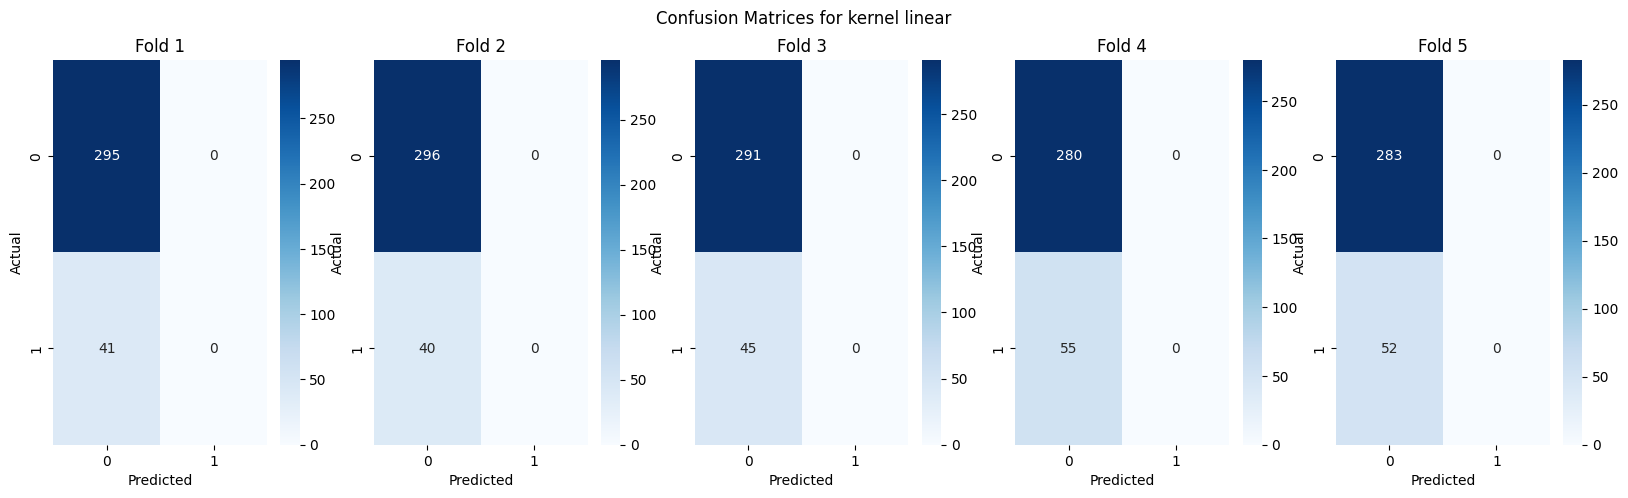


Hasil Keseluruhan untuk kernel poly:
Mean Accuracy: 92.31%
Total Execution Time: 0.8968 seconds
SVC(C=1000, gamma=1, kernel='poly')


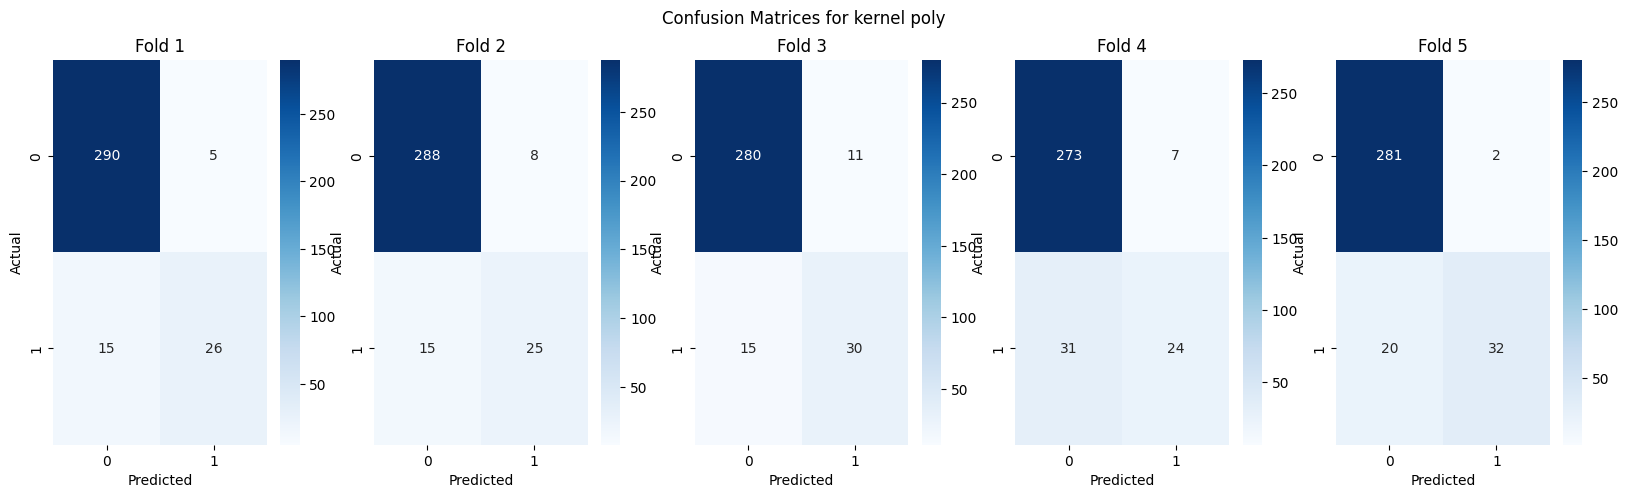


Hasil Keseluruhan untuk kernel rbf:
Mean Accuracy: 92.19%
Total Execution Time: 0.1688 seconds
SVC(C=10, gamma=1)


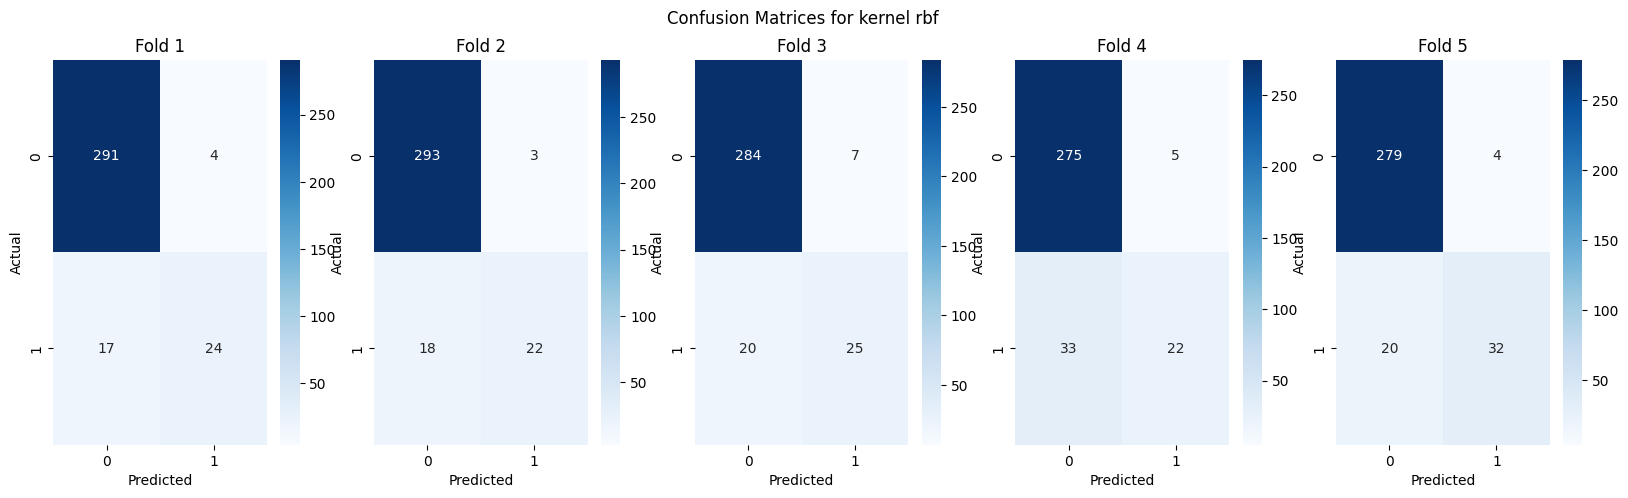


Hasil Keseluruhan untuk kernel sigmoid:
Mean Accuracy: 86.11%
Total Execution Time: 0.2101 seconds
SVC(C=0.1, gamma=0.1, kernel='sigmoid')


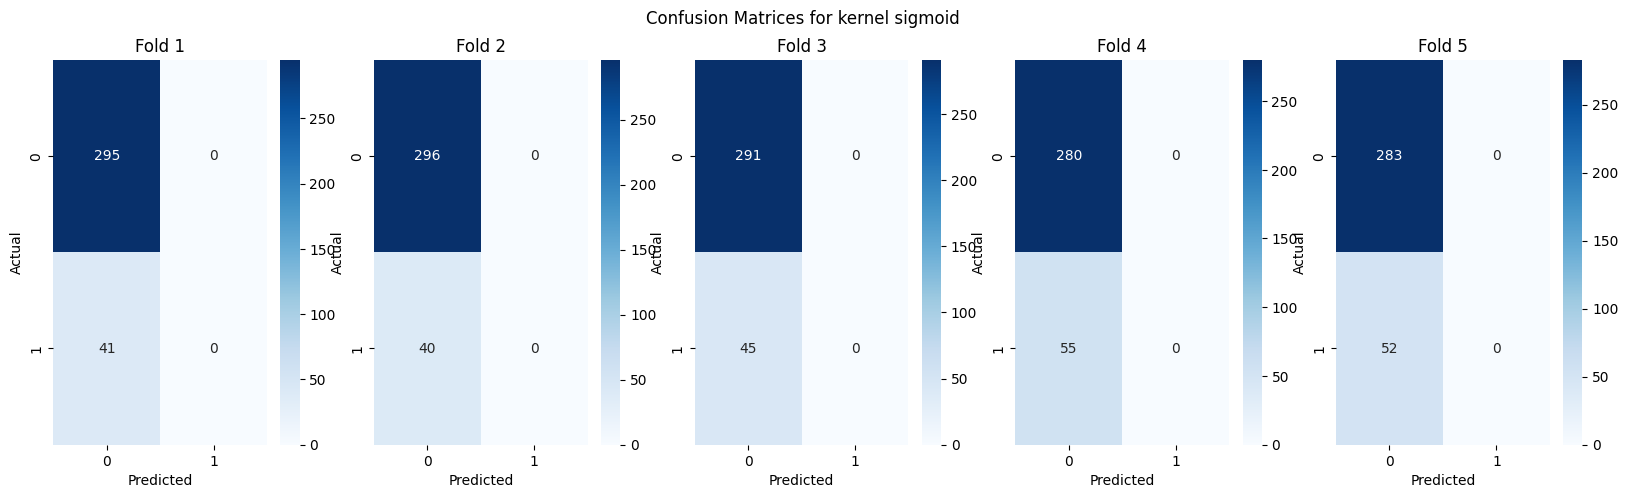

In [11]:
import time
import numpy as np
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.svm import SVC
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

# Inisialisasi K-Fold Cross Validation
k_fold = KFold(n_splits=5, shuffle=True, random_state=0)

# Dictionary untuk menyimpan model yang dilatih, akurasi, dan waktu eksekusi
results = {
    'linear': {'model': None, 'accuracies': [], 'execution_times': [], 'confusion_matrices': []},
    'poly': {'model': None, 'accuracies': [], 'execution_times': [], 'confusion_matrices': []},
    'rbf': {'model': None, 'accuracies': [], 'execution_times': [], 'confusion_matrices': []},
    'sigmoid': {'model': None, 'accuracies': [], 'execution_times': [], 'confusion_matrices': []}
}

# Melakukan iterasi melalui parameter terbaik untuk setiap kernel
for kernel, params in best_params.items():
    print("")
    if params:
        print(f"Melakukan K-Fold Cross Validation untuk kernel: {kernel}")

        model = SVC(**params)
        results[kernel]['model'] = model

        start_time = time.time()

        # Melakukan validasi silang dan menyimpan akurasi dari setiap iterasi
        for i, (train_index, test_index) in enumerate(k_fold.split(X_train)):
            X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[test_index]
            y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[test_index]

            fold_start_time = time.time()

            # Melatih model
            model.fit(X_train_fold, y_train_fold)

            # Menyimpan model
            with open(f"NoSMOTEmodel_{params['kernel']}_{i+1}.pkl", 'wb') as f:
              pickle.dump(model, f)

            # Menguji model
            y_pred_fold = model.predict(X_val_fold)

            # Menghitung akurasi di setiap fold
            accuracy_fold = accuracy_score(y_val_fold, y_pred_fold)
            results[kernel]['accuracies'].append(accuracy_fold)

            # Menghitung confusion matrix di setiap fold
            cm = confusion_matrix(y_val_fold, y_pred_fold)
            results[kernel]['confusion_matrices'].append(cm)

            fold_end_time = time.time()

            # Menghitung dan menyimpan waktu eksekusi fold
            fold_execution_time = fold_end_time - fold_start_time
            results[kernel]['execution_times'].append(fold_execution_time)

            print(f'Accuracy di fold {i+1} untuk kernel {kernel}: {accuracy_fold * 100:.2f}%')
            print(f'Fold {i+1} execution time untuk kernel {kernel}: {fold_execution_time:.4f} seconds')

        end_time = time.time()

        # Menampilkan rata-rata akurasi dari setiap lipatan
        mean_accuracy = np.mean(results[kernel]['accuracies'])
        print(f'Mean Accuracy of K-Fold Cross Validation untuk kernel {kernel}: {mean_accuracy * 100:.2f}%')

        # Menampilkan waktu total eksekusi K-Fold Cross Validation
        total_execution_time = end_time - start_time
        print(f'Total Execution Time of K-Fold Cross Validation untuk kernel {kernel}: {total_execution_time:.4f} seconds')

# Menampilkan hasil keseluruhan
for kernel, result in results.items():
    if result['model']:
        mean_accuracy = np.mean(result['accuracies'])
        total_execution_time = np.sum(result['execution_times'])
        print(f'\nHasil Keseluruhan untuk kernel {kernel}:')
        print(f'Mean Accuracy: {mean_accuracy * 100:.2f}%')
        print(f'Total Execution Time: {total_execution_time:.4f} seconds')
        print(result['model'])
        # Plotting confusion matrices
        fig, axes = plt.subplots(1, 5, figsize=(20, 5))
        fig.suptitle(f'Confusion Matrices for kernel {kernel}')
        for i, cm in enumerate(result['confusion_matrices']):
            sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[i])
            axes[i].set_title(f'Fold {i+1}')
            axes[i].set_xlabel('Predicted')
            axes[i].set_ylabel('Actual')
        plt.show()


## **SMOTE**

In [12]:
from imblearn.over_sampling import SMOTE

In [13]:
from collections import Counter

In [14]:
# Bagi dataset menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Tampilkan jumlah data kelas dari data training sebelum SMOTE
label_kelas = np.array(y_train)
print("Jumlah Data Kelas Dari Data Training Pada Data Sebelum SMOTE:")
print("Kelas 0:", np.sum(label_kelas == 0))
print("Kelas 1:", np.sum(label_kelas == 1))

# Scaling data (jika diperlukan)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Inisialisasi SMOTE
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_scaled, y_train)

# Tampilkan jumlah data kelas dari data training setelah SMOTE
print("\nJumlah Data Kelas Dari Data Training Setelah SMOTE:")
print("Kelas 0:", np.sum(y_train_balanced == 0))
print("Kelas 1:", np.sum(y_train_balanced == 1))

print("\nJumlah Data Dari Data Training Sebelum SMOTE:", len(X_train))
print("Jumlah Data Dari Data Training Setelah SMOTE:", len(X_train_balanced))

Jumlah Data Kelas Dari Data Training Pada Data Sebelum SMOTE:
Kelas 0: 1424
Kelas 1: 254

Jumlah Data Kelas Dari Data Training Setelah SMOTE:
Kelas 0: 1424
Kelas 1: 1424

Jumlah Data Dari Data Training Sebelum SMOTE: 1678
Jumlah Data Dari Data Training Setelah SMOTE: 2848


In [15]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1678, 5)
(1678,)
(420, 5)
(420,)


## **SVM WITH SMOTE**

In [ ]:
import time
import numpy as np
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.svm import SVC
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

# Inisialisasi K-Fold Cross Validation
k_fold = KFold(n_splits=5, shuffle=True, random_state=0)

# Dictionary untuk menyimpan model yang dilatih, akurasi, dan waktu eksekusi
results = {
    'linear': {'model': None, 'accuracies': [], 'execution_times': [], 'confusion_matrices': []},
    'poly': {'model': None, 'accuracies': [], 'execution_times': [], 'confusion_matrices': []},
    'rbf': {'model': None, 'accuracies': [], 'execution_times': [], 'confusion_matrices': []},
    'sigmoid': {'model': None, 'accuracies': [], 'execution_times': [], 'confusion_matrices': []}
}

# Melakukan iterasi melalui parameter terbaik untuk setiap kernel
for kernel, params in best_params.items():
    print("")
    if params:
        print(f"Melakukan K-Fold Cross Validation untuk kernel: {kernel}")

        model = SVC(**params)
        results[kernel]['model'] = model

        start_time = time.time()

        # Melakukan validasi silang dan menyimpan akurasi dari setiap iterasi
        for i, (train_index, test_index) in enumerate(k_fold.split(X_train_balanced)):
            X_train_fold, X_val_fold = X_train_balanced[train_index], X_train_balanced[test_index]
            y_train_fold, y_val_fold = y_train_balanced[train_index], y_train_balanced[test_index]

            fold_start_time = time.time()

            # Melatih model
            model.fit(X_train_fold, y_train_fold)

            # Menyimpan model
            with open(f"withSMOTEmodel_{params['kernel']}_{i+1}.pkl", 'wb') as f:
              pickle.dump(model, f)

            # Menguji model
            y_pred_fold = model.predict(X_val_fold)

            # Menghitung akurasi di setiap fold
            accuracy_fold = accuracy_score(y_val_fold, y_pred_fold)
            results[kernel]['accuracies'].append(accuracy_fold)

            # Menghitung confusion matrix di setiap fold
            cm = confusion_matrix(y_val_fold, y_pred_fold)
            results[kernel]['confusion_matrices'].append(cm)

            fold_end_time = time.time()

            # Menghitung dan menyimpan waktu eksekusi fold
            fold_execution_time = fold_end_time - fold_start_time
            results[kernel]['execution_times'].append(fold_execution_time)

            print(f'Accuracy di fold {i+1} untuk kernel {kernel}: {accuracy_fold * 100:.2f}%')
            print(f'Fold {i+1} execution time untuk kernel {kernel}: {fold_execution_time:.4f} seconds')

        end_time = time.time()

        # Menampilkan rata-rata akurasi dari setiap lipatan
        mean_accuracy = np.mean(results[kernel]['accuracies'])
        print(f'Mean Accuracy of K-Fold Cross Validation untuk kernel {kernel}: {mean_accuracy * 100:.2f}%')

        # Menampilkan waktu total eksekusi K-Fold Cross Validation
        total_execution_time = end_time - start_time
        print(f'Total Execution Time of K-Fold Cross Validation untuk kernel {kernel}: {total_execution_time:.4f} seconds')

# Menampilkan hasil keseluruhan
for kernel, result in results.items():
    if result['model']:
        mean_accuracy = np.mean(result['accuracies'])
        total_execution_time = np.sum(result['execution_times'])
        print(f'\nHasil Keseluruhan untuk kernel {kernel}:')
        print(f'Mean Accuracy: {mean_accuracy * 100:.2f}%')
        print(f'Total Execution Time: {total_execution_time:.4f} seconds')
        print(result['model'])
        # Plotting confusion matrices
        fig, axes = plt.subplots(1, 5, figsize=(20, 5))
        fig.suptitle(f'Confusion Matrices for kernel {kernel}')
        for i, cm in enumerate(result['confusion_matrices']):
            sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[i])
            axes[i].set_title(f'Fold {i+1}')
            axes[i].set_xlabel('Predicted')
            axes[i].set_ylabel('Actual')
        plt.show()



Melakukan K-Fold Cross Validation untuk kernel: linear
Accuracy di fold 1 untuk kernel linear: 83.51%
Fold 1 execution time untuk kernel linear: 0.1456 seconds
Accuracy di fold 2 untuk kernel linear: 82.63%
Fold 2 execution time untuk kernel linear: 0.1158 seconds
Accuracy di fold 3 untuk kernel linear: 82.63%
Fold 3 execution time untuk kernel linear: 0.1201 seconds
Accuracy di fold 4 untuk kernel linear: 84.01%
Fold 4 execution time untuk kernel linear: 0.1166 seconds
Accuracy di fold 5 untuk kernel linear: 82.43%
Fold 5 execution time untuk kernel linear: 0.1323 seconds
Mean Accuracy of K-Fold Cross Validation untuk kernel linear: 83.04%
Total Execution Time of K-Fold Cross Validation untuk kernel linear: 0.6478 seconds

Melakukan K-Fold Cross Validation untuk kernel: poly
Accuracy di fold 1 untuk kernel poly: 88.60%
Fold 1 execution time untuk kernel poly: 249.6654 seconds
Accuracy di fold 2 untuk kernel poly: 87.72%
Fold 2 execution time untuk kernel poly: 296.3594 seconds


## **Eclidean Distance**

In [ ]:
import time
import numpy as np
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.svm import SVC
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
from sklearn.metrics.pairwise import euclidean_distances
# Inisialisasi K-Fold Cross Validation
k_fold = KFold(n_splits=5, shuffle=True, random_state=0)

# Dictionary untuk menyimpan model yang dilatih, akurasi, dan waktu eksekusi
results = {
    'euclidean': {'model': None, 'accuracies': [], 'execution_times': [], 'confusion_matrices': []},
}

# Melakukan iterasi melalui parameter terbaik untuk setiap kernel
# for kernel, params in best_params.items():
    # print("")
# if params:
print(f"Melakukan K-Fold Cross Validation untuk kernel: euclidean")

train_distances = euclidean_distances(X_train_balanced)
train_features = train_distances

model = SVC(C=0.1, gamma=1, kernel='linear', random_state=42)
results['euclidean']['model'] = model

start_time = time.time()

# Melakukan validasi silang dan menyimpan akurasi dari setiap iterasi
for i, (train_index, test_index) in enumerate(k_fold.split(train_features)):
    X_train_fold, X_val_fold = train_features[train_index], train_features[test_index]
    y_train_fold, y_val_fold = y_train_balanced[train_index], y_train_balanced[test_index]

    fold_start_time = time.time()

    # Melatih model
    model.fit(X_train_fold, y_train_fold)

    # Menyimpan model
    with open(f"model_euclidean_{i+1}.pkl", 'wb') as f:
      pickle.dump(model, f)

    # Menguji model
    y_pred_fold = model.predict(X_val_fold)

    # Menghitung akurasi di setiap fold
    accuracy_fold = accuracy_score(y_val_fold, y_pred_fold)
    results['euclidean']['accuracies'].append(accuracy_fold)

    # Menghitung confusion matrix di setiap fold
    cm = confusion_matrix(y_val_fold, y_pred_fold)
    results['euclidean']['confusion_matrices'].append(cm)

    fold_end_time = time.time()

    # Menghitung dan menyimpan waktu eksekusi fold
    fold_execution_time = fold_end_time - fold_start_time
    results['euclidean']['execution_times'].append(fold_execution_time)

    print(f'Accuracy di fold {i+1} untuk kernel {"euclidean"}: {accuracy_fold * 100:.2f}%')
    print(f'Fold {i+1} execution time untuk kernel {"euclidean"}: {fold_execution_time:.4f} seconds')

end_time = time.time()

# Menampilkan rata-rata akurasi dari setiap lipatan
mean_accuracy = np.mean(results['euclidean']['accuracies'])
print(f'Mean Accuracy of K-Fold Cross Validation untuk kernel {"euclidean"}: {mean_accuracy * 100:.2f}%')

# Menampilkan waktu total eksekusi K-Fold Cross Validation
total_execution_time = end_time - start_time
print(f'Total Execution Time of K-Fold Cross Validation untuk kernel {"euclidean"}: {total_execution_time:.4f} seconds')

# Menampilkan hasil keseluruhan
for kernel, result in results.items():
    if result['model']:
        mean_accuracy = np.mean(result['accuracies'])
        total_execution_time = np.sum(result['execution_times'])
        print(f'\nHasil Keseluruhan untuk kernel {kernel}:')
        print(f'Mean Accuracy: {mean_accuracy * 100:.2f}%')
        print(f'Total Execution Time: {total_execution_time:.4f} seconds')
        print(result['model'])
        # Plotting confusion matrices
        fig, axes = plt.subplots(1, 5, figsize=(20, 5))
        fig.suptitle(f'Confusion Matrices for kernel {kernel}')
        for i, cm in enumerate(result['confusion_matrices']):
            sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[i])
            axes[i].set_title(f'Fold {i+1}')
            axes[i].set_xlabel('Predicted')
            axes[i].set_ylabel('Actual')
        plt.show()


## **Manhattan Distance**

In [ ]:
import time
import numpy as np
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.svm import SVC
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
from sklearn.metrics.pairwise import pairwise_distances

# Definisikan kernel kustom menggunakan Manhattan distance
def manhattan_kernel(X, Y):
    return -pairwise_distances(X, Y, metric='manhattan')
# Inisialisasi K-Fold Cross Validation
k_fold = KFold(n_splits=5, shuffle=True, random_state=0)

# Dictionary untuk menyimpan model yang dilatih, akurasi, dan waktu eksekusi
results = {
    'manhattan': {'model': None, 'accuracies': [], 'execution_times': [], 'confusion_matrices': []},
}

# Melakukan iterasi melalui parameter terbaik untuk setiap kernel
# for kernel, params in best_params.items():
    # print("")
# if params:
print(f"Melakukan K-Fold Cross Validation untuk kernel: Manhattan")

model = SVC(kernel=manhattan_kernel)
results['manhattan']['model'] = model

start_time = time.time()

# Melakukan validasi silang dan menyimpan akurasi dari setiap iterasi
for i, (train_index, test_index) in enumerate(k_fold.split(X_train_balanced)):
    X_train_fold, X_val_fold = X_train_balanced[train_index], X_train_balanced[test_index]
    y_train_fold, y_val_fold = y_train_balanced[train_index], y_train_balanced[test_index]

    fold_start_time = time.time()

    # Melatih model
    model.fit(X_train_fold, y_train_fold)

    # Menyimpan model
    with open(f"model_manhattan_{i+1}.pkl", 'wb') as f:
      pickle.dump(model, f)

    # Menguji model
    y_pred_fold = model.predict(X_val_fold)

    # Menghitung akurasi di setiap fold
    accuracy_fold = accuracy_score(y_val_fold, y_pred_fold)
    results['manhattan']['accuracies'].append(accuracy_fold)

    # Menghitung confusion matrix di setiap fold
    cm = confusion_matrix(y_val_fold, y_pred_fold)
    results['manhattan']['confusion_matrices'].append(cm)

    fold_end_time = time.time()

    # Menghitung dan menyimpan waktu eksekusi fold
    fold_execution_time = fold_end_time - fold_start_time
    results['manhattan']['execution_times'].append(fold_execution_time)

    print(f'Accuracy di fold {i+1} untuk kernel {"manhattan"}: {accuracy_fold * 100:.2f}%')
    print(f'Fold {i+1} execution time untuk kernel {"manhattan"}: {fold_execution_time:.4f} seconds')

end_time = time.time()

# Menampilkan rata-rata akurasi dari setiap lipatan
mean_accuracy = np.mean(results['manhattan']['accuracies'])
print(f'Mean Accuracy of K-Fold Cross Validation untuk kernel {"manhattan"}: {mean_accuracy * 100:.2f}%')

# Menampilkan waktu total eksekusi K-Fold Cross Validation
total_execution_time = end_time - start_time
print(f'Total Execution Time of K-Fold Cross Validation untuk kernel {"manhattan"}: {total_execution_time:.4f} seconds')

# Menampilkan hasil keseluruhan
for kernel, result in results.items():
    if result['model']:
        mean_accuracy = np.mean(result['accuracies'])
        total_execution_time = np.sum(result['execution_times'])
        print(f'\nHasil Keseluruhan untuk kernel {kernel}:')
        print(f'Mean Accuracy: {mean_accuracy * 100:.2f}%')
        print(f'Total Execution Time: {total_execution_time:.4f} seconds')
        print(result['model'])
        # Plotting confusion matrices
        fig, axes = plt.subplots(1, 5, figsize=(20, 5))
        fig.suptitle(f'Confusion Matrices for kernel {kernel}')
        for i, cm in enumerate(result['confusion_matrices']):
            sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[i])
            axes[i].set_title(f'Fold {i+1}')
            axes[i].set_xlabel('Predicted')
            axes[i].set_ylabel('Actual')
        plt.show()


## **Undersampling**

In [ ]:
import time
import numpy as np
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.svm import SVC
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

# Menggunakan undersampling untuk menyeimbangkan kelas pada data latih
undersampler = RandomUnderSampler(random_state=42)
X_train_resampled, y_train_resampled = undersampler.fit_resample(X_train, y_train)

# Inisialisasi K-Fold Cross Validation
k_fold = KFold(n_splits=5, shuffle=True, random_state=0)

# Dictionary untuk menyimpan model yang dilatih, akurasi, dan waktu eksekusi
results = {
    'linear': {'model': None, 'accuracies': [], 'execution_times': [], 'confusion_matrices': []},
    'poly': {'model': None, 'accuracies': [], 'execution_times': [], 'confusion_matrices': []},
    'rbf': {'model': None, 'accuracies': [], 'execution_times': [], 'confusion_matrices': []},
    'sigmoid': {'model': None, 'accuracies': [], 'execution_times': [], 'confusion_matrices': []}
}

# Melakukan iterasi melalui parameter terbaik untuk setiap kernel
for kernel, params in best_params.items():
    print("")
    if params:
        print(f"Melakukan K-Fold Cross Validation untuk kernel: {kernel}")

        model = SVC(**params)
        results[kernel]['model'] = model

        start_time = time.time()

        # Melakukan validasi silang dan menyimpan akurasi dari setiap iterasi
        for i, (train_index, test_index) in enumerate(k_fold.split(X_train_resampled)):
            X_train_fold, X_val_fold = X_train_resampled.iloc[train_index], X_train_resampled.iloc[test_index]
            y_train_fold, y_val_fold = y_train_resampled.iloc[train_index], y_train_resampled.iloc[test_index]

            fold_start_time = time.time()

            # Melatih model
            model.fit(X_train_fold, y_train_fold)

            # Menyimpan model
            with open(f"undersamplEmodel_{params['kernel']}_{i+1}.pkl", 'wb') as f:
              pickle.dump(model, f)

            # Menguji model
            y_pred_fold = model.predict(X_val_fold)

            # Menghitung akurasi di setiap fold
            accuracy_fold = accuracy_score(y_val_fold, y_pred_fold)
            results[kernel]['accuracies'].append(accuracy_fold)

            # Menghitung confusion matrix di setiap fold
            cm = confusion_matrix(y_val_fold, y_pred_fold)
            results[kernel]['confusion_matrices'].append(cm)

            fold_end_time = time.time()

            # Menghitung dan menyimpan waktu eksekusi fold
            fold_execution_time = fold_end_time - fold_start_time
            results[kernel]['execution_times'].append(fold_execution_time)

            print(f'Accuracy di fold {i+1} untuk kernel {kernel}: {accuracy_fold * 100:.2f}%')
            print(f'Fold {i+1} execution time untuk kernel {kernel}: {fold_execution_time:.4f} seconds')

        end_time = time.time()

        # Menampilkan rata-rata akurasi dari setiap lipatan
        mean_accuracy = np.mean(results[kernel]['accuracies'])
        print(f'Mean Accuracy of K-Fold Cross Validation untuk kernel {kernel}: {mean_accuracy * 100:.2f}%')

        # Menampilkan waktu total eksekusi K-Fold Cross Validation
        total_execution_time = end_time - start_time
        print(f'Total Execution Time of K-Fold Cross Validation untuk kernel {kernel}: {total_execution_time:.4f} seconds')

# Menampilkan hasil keseluruhan
for kernel, result in results.items():
    if result['model']:
        mean_accuracy = np.mean(result['accuracies'])
        total_execution_time = np.sum(result['execution_times'])
        print(f'\nHasil Keseluruhan untuk kernel {kernel}:')
        print(f'Mean Accuracy: {mean_accuracy * 100:.2f}%')
        print(f'Total Execution Time: {total_execution_time:.4f} seconds')
        print(result['model'])
        # Plotting confusion matrices
        fig, axes = plt.subplots(1, 5, figsize=(20, 5))
        fig.suptitle(f'Confusion Matrices for kernel {kernel}')
        for i, cm in enumerate(result['confusion_matrices']):
            sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[i])
            axes[i].set_title(f'Fold {i+1}')
            axes[i].set_xlabel('Predicted')
            axes[i].set_ylabel('Actual')
        plt.show()


## **Uji coba Data Baru**

In [ ]:
mysample = [[0, 2.9, 48.0, 0, 1]]

# Perform the prediction
predicted = grid_search.best_estimator_.predict(mysample)

if predicted == 0:
    result = 'Stunting'
    accuracy = 'N/A'
elif predicted == 1:
    result = 'Normal'
    accuracy = 'N/A'

print(f'Kemungkinan anda {result}')
